<a href="https://colab.research.google.com/github/Majdi21926/BBC_News_Classification/blob/main/BBC_News_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install tensorflow==2.5.0

In [ ]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# bbc-text.csv
!gdown --id 1rX10xeI3eUJmOLsc4pOPY6AnCLO8DxNj

Downloading...
From: https://drive.google.com/uc?id=1rX10xeI3eUJmOLsc4pOPY6AnCLO8DxNj
To: /content/bbc-text.csv
100% 5.06M/5.06M [00:00<00:00, 35.5MB/s]


In [ ]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_portion = .8

In [ ]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))


153


In [ ]:
import pandas as pd

In [ ]:
with open("./bbc-text.csv", 'r') as csvfile:
  bbcdata = pd.read_csv(csvfile)

labels = bbcdata.iloc[:,0]
sentences = bbcdata.iloc[:,-1]

    
print(len(labels))
print(len(sentences))
print(sentences[0])


2225
2225
tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-i

In [ ]:
raw_labels = []
for i in range(len(labels)-1):
  if labels[i] != labels[i+1]:
    if labels[i] not in raw_labels:
      raw_labels.append(labels[i])


In [ ]:
raw_labels

['tech', 'business', 'sport', 'entertainment', 'politics']

In [ ]:
len(raw_labels)

5

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoded_labels=encoder.fit_transform(labels)
encoded_labels

array([4, 0, 3, ..., 1, 2, 3])

In [ ]:
train_size = 0.8

#train_sentences, validation_sentences, train_labels, validation_labels = train_test_split(sentences, labels, train_size = train_size)
train_sentences, validation_sentences, train_labels, validation_labels = train_test_split(sentences, encoded_labels, train_size = train_size)



print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))



0.8
1780
1780
445
445


In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen=max_length, truncating=trunc_type, padding=padding_type)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))



506
120
268
120
327
120


In [ ]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

print(len(validation_sequences))
print(validation_padded.shape)



445
(445, 120)


In [ ]:
#label_tokenizer = Tokenizer()
#label_tokenizer.fit_on_texts(labels)

#training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
#validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

#print(training_label_seq[0])
#print(training_label_seq[1])
#print(training_label_seq[2])
#print(training_label_seq.shape)

#print(validation_label_seq[0])
#print(validation_label_seq[1])
#print(validation_label_seq[2])
#print(validation_label_seq.shape)



[4]
[2]
[4]
(1780, 1)
[5]
[2]
[3]
(445, 1)


In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(24, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           16000     
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 24)                408       
                                                                 
 dense_3 (Dense)             (None, 5)                 125       
                                                                 
Total params: 16,533
Trainable params: 16,533
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(len(train_padded))
len(train_labels)

1780


1780

In [ ]:
num_epochs = 30
#history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)


history = model.fit(train_padded, 
                    train_labels, 
                    epochs=num_epochs, 
                    validation_data=(validation_padded, validation_labels), 
                    verbose=2)

Epoch 1/30
56/56 - 3s - loss: 1.6013 - accuracy: 0.2348 - val_loss: 1.5972 - val_accuracy: 0.2045 - 3s/epoch - 46ms/step
Epoch 2/30
56/56 - 0s - loss: 1.5728 - accuracy: 0.2506 - val_loss: 1.5647 - val_accuracy: 0.3416 - 323ms/epoch - 6ms/step
Epoch 3/30
56/56 - 0s - loss: 1.5027 - accuracy: 0.3860 - val_loss: 1.4886 - val_accuracy: 0.3798 - 318ms/epoch - 6ms/step
Epoch 4/30
56/56 - 0s - loss: 1.3674 - accuracy: 0.5000 - val_loss: 1.3593 - val_accuracy: 0.5416 - 311ms/epoch - 6ms/step
Epoch 5/30
56/56 - 0s - loss: 1.1832 - accuracy: 0.6534 - val_loss: 1.2052 - val_accuracy: 0.5798 - 316ms/epoch - 6ms/step
Epoch 6/30
56/56 - 0s - loss: 0.9946 - accuracy: 0.7444 - val_loss: 1.0594 - val_accuracy: 0.7191 - 317ms/epoch - 6ms/step
Epoch 7/30
56/56 - 0s - loss: 0.8252 - accuracy: 0.8618 - val_loss: 0.9259 - val_accuracy: 0.7865 - 311ms/epoch - 6ms/step
Epoch 8/30
56/56 - 0s - loss: 0.6773 - accuracy: 0.9011 - val_loss: 0.8162 - val_accuracy: 0.8157 - 274ms/epoch - 5ms/step
Epoch 9/30
56/56 -

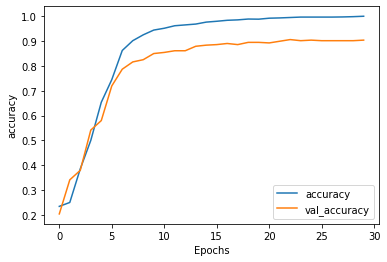

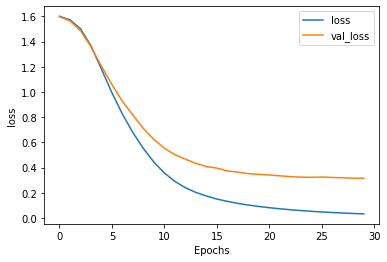

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

# Expected output
# (1000, 16)

In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')